# Pandas: data handling

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
categories = ['a', 'b', 'c']
my_list = [11, 22, 33]

In [ ]:
ser = pd.Series(data = my_list, index = categories) 
ser

#### Pandas **DataFrame**

**DataFrames** are the basis of Pandas.

* A dataframe is a set of Series put together to share the same index.
* Think of DataFrames as an Excel, or data table in JavaScript
* Typically the nomenclature for a Pandas DataFrame is **df**
* To create a DataFrame, use `pd.DataFrame()`. Consider the DataFrame below created based on the following arguments:
	* data are an array.
	* index is a list A to E
	* columns a list Col1 to Col4


In [ ]:
np.random.seed(42)
df = pd.DataFrame(data=np.random.randn(5,4),
                  index=['A', 'B', 'C', 'D', 'E'],
                  columns=['Col1', 'Col2', 'Col3', 'Col4']
                  )

In [ ]:
df

In [ ]:
df['Col1']

In [ ]:
df[['Col1', 'Col2']]

In [ ]:
df.filter(['Col1'])

In [ ]:
df1 = df.copy()
df1

In [ ]:
df1['Col5'] = df['Col1']

In [ ]:
print(df1)
print(df)

In [ ]:
df1.drop(labels=['A', 'D'], axis=0) # axis = 1 is for collumns and axis = 0 is for rows


In [ ]:
df1.drop(labels=['A', 'D'], axis=0, inplace=True)

In [ ]:
df1

### `.groupby()`

In [60]:
data = {'Product':['Bread','Bread','Milk','Milk','Milk','Butter','Butter','Butter'],
        'Person':['Anna','Anna','Brian','John','John','Carl','Sarah','Anna'],
        'Sales':[200,120,340,124,243,350,500,240],
        'Quantity':[3,5,3,8,2,7,5,4],
        'Margin':[100,20,280,50,100,67,300,200]}

df = pd.DataFrame(data)
df

,Product,Person,Sales,Quantity,Margin
0,Bread,Anna,200,3,100
1,Bread,Anna,120,5,20
2,Milk,Brian,340,3,280
3,Milk,John,124,8,50
4,Milk,John,243,2,100
5,Butter,Carl,350,7,67
6,Butter,Sarah,500,5,300
7,Butter,Anna,240,4,200


In [61]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [64]:
df.groupby(by=['Product'])

In [65]:
df

,Product,Person,Sales,Quantity,Margin
0,Bread,Anna,200,3,100
1,Bread,Anna,120,5,20
2,Milk,Brian,340,3,280
3,Milk,John,124,8,50
4,Milk,John,243,2,100
5,Butter,Carl,350,7,67
6,Butter,Sarah,500,5,300
7,Butter,Anna,240,4,200


In [72]:
by_group = df.groupby(by=['Product'])['Margin'].mean()
by_group.values

array([ 60.        , 189.        , 143.33333333])

### Index and Values

In [73]:
by_group.index

Index(['Bread', 'Butter', 'Milk'], dtype='str', name='Product')

In [75]:
by_group.values

array([ 60.        , 189.        , 143.33333333])

### In Class Exercise

In [146]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [96]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [98]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
df.shape

(891, 12)

In [129]:
df.isna().sum() # any infromaton that is not aviliable

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
df.dropna(inplace=True) # dropping all data points that have not got all fields filled.

In [132]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [133]:
by_group = df.groupby(by=['Survived'])['Age'].mean()
print(by_group.values)
print(by_group.index)

[30.62617925 28.19329861]
Index([0, 1], dtype='int64', name='Survived')


In [135]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


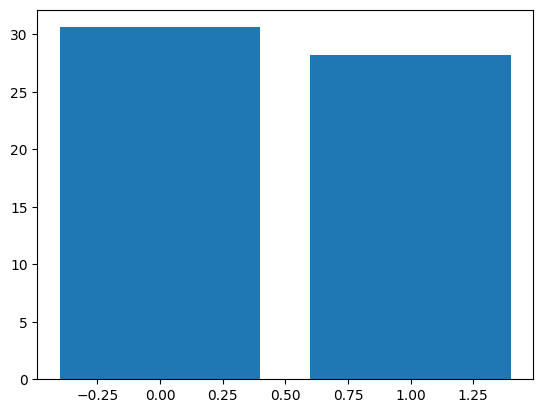

In [147]:
plt.bar(by_group.index, by_group.values)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

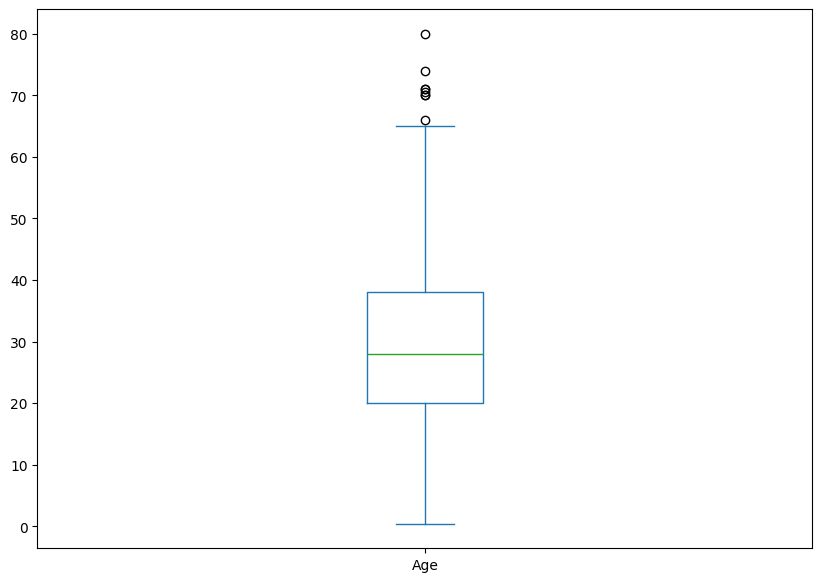

In [148]:
df.plot(kind='box', y=['Age'], figsize=(10,7))
plt.show